<a href="https://colab.research.google.com/github/it5joys135/ML-Projects/blob/main/TF_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
# Get the Data
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2024-12-26 11:32:17--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv.3’

moore.csv.3         100%[===================>]   2.25K  --.-KB/s    in 0s      

2024-12-26 11:32:17 (32.7 MB/s) - ‘moore.csv.3’ saved [2302/2302]



In [ ]:
!head moore.csv

1971,2300
1972,3500
1973,2500
1973,2500
1974,4100
1974,4500
1974,8000
1975,3510
1976,5000
1976,8500


In [ ]:
# Load the data
df = pd.read_csv('moore.csv', header=None).to_numpy()
df

array([[       1971,        2300],
       [       1972,        3500],
       [       1973,        2500],
       [       1973,        2500],
       [       1974,        4100],
       [       1974,        4500],
       [       1974,        8000],
       [       1975,        3510],
       [       1976,        5000],
       [       1976,        8500],
       [       1976,        6500],
       [       1978,        9000],
       [       1978,       29000],
       [       1979,       17500],
       [       1979,       29000],
       [       1979,       68000],
       [       1981,       11500],
       [       1982,       55000],
       [       1982,      134000],
       [       1983,       22000],
       [       1984,       63000],
       [       1984,      190000],
       [       1985,      275000],
       [       1985,       25000],
       [       1985,       16000],
       [       1986,      110000],
       [       1986,      375000],
       [       1986,       30000],
       [       1987,

In [ ]:
X = df[:, 0].reshape(-1, 1)  # Making an N x D array
y = df[:, 1]

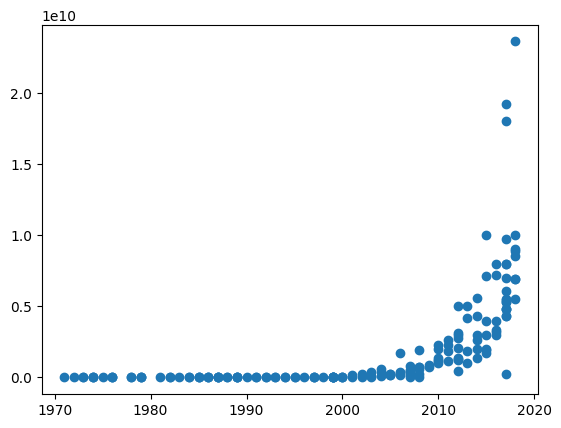

In [ ]:
# Plot the data
plt.scatter(X, y);

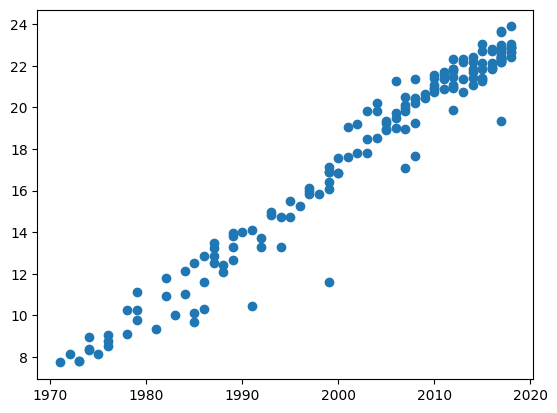

In [ ]:
# Because we want a linear model and data is exponental from the scatter plot

y = np.log(y)

plt.scatter(X, y)

In [ ]:
X = X - X.mean()

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(0.001, 0.9),
    loss='mse',
    )

In [ ]:
def schedule(epochs, lr):    # lr --> learning rate
  if epochs >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [ ]:
r = model.fit(X, y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 377.1391 - learning_rate: 0.0010
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 308.4066 - learning_rate: 0.0010
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 246.0187 - learning_rate: 0.0010
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 200.2178 - learning_rate: 0.0010
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 171.5311 - learning_rate: 0.0010
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 133.8313 - learning_rate: 0.0010
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 95.0764 - learning_rate: 0.0010
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 62.6538 - learning_rate: 0.0010
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 54.6094 - learning_rate: 0.0010
Epoch 10/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 55.1624 - learning_rate: 0.0010
Epoch 11/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 51.2702 - learning_rate: 0.0010
Epoch 12/200


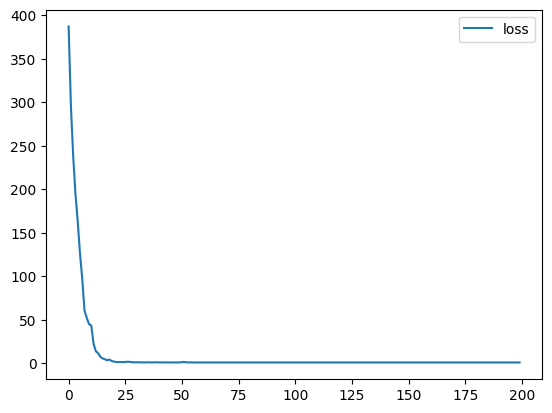

In [ ]:
plt.plot(r.history['loss'], label='loss')
plt.legend();

In [ ]:
model.layers

[<Dense name=dense_2, built=True>]

In [ ]:
model.layers[0].get_weights()

[array([[0.33820668]], dtype=float32), array([17.770294], dtype=float32)]

In [ ]:
a = model.layers[0].get_weights()[0][0,0]
a

0.33820668

In [ ]:
print('Time to Double:', np.log(2)/a)

Time to Double: 2.0494780983330685


In [ ]:
X = X.flatten()
denominator = X.dot(X) - X.mean() * X.sum()
a = (X.dot(y) - y.mean() * X.sum()) / denominator
b = (y.mean() * X.dot(X) - X.mean() * X.dot(y)) /denominator
a, b

(0.341682487387313, 17.764939393631764)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


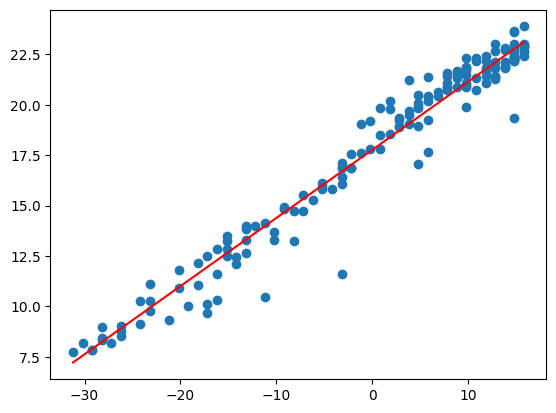

In [ ]:
yhat = model.predict(X).flatten()

plt.scatter(X, y)
plt.plot(X, yhat, color='red');

In [ ]:
# Manual Calculation

# Get the weights
w, b = model.layers[0].get_weights()

# Reshape X because we flatten it earlier
X = X.reshape(-1, 1)

# (N x 1) x (1 x 1) + 1 ----> (N x 1)
yhat2 = (X.dot(w) + b).flatten()

# Don't use == for floating points
np.allclose(yhat, yhat2)

True